In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

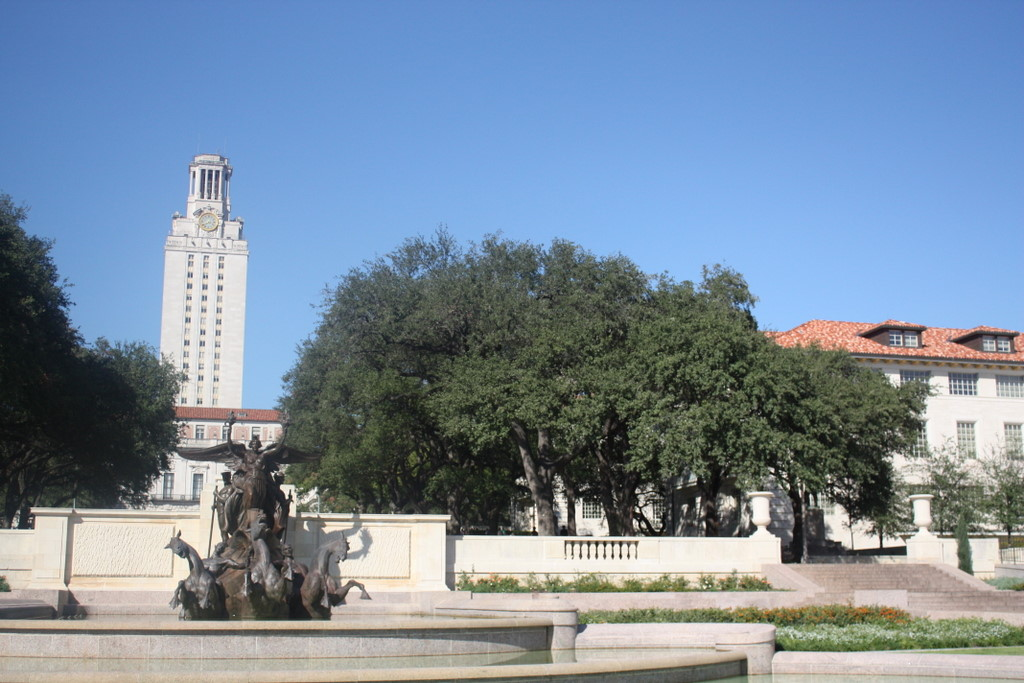

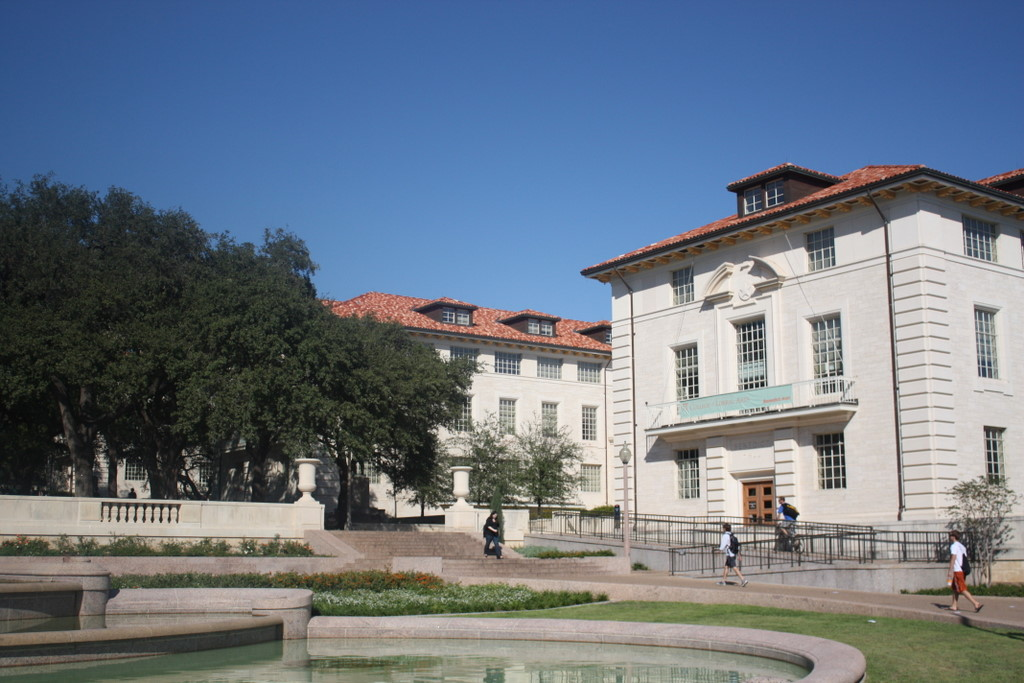

In [13]:
from google.colab.patches import cv2_imshow

img_ = cv2.imread('left.jpeg')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('right.jpeg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2_imshow(img_)
cv2_imshow(img)

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [8]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [9]:
# Apply ratio test
good = []
for m in matches:
  if m[0].distance < 0.5*m[1].distance:
    good.append(m)
matches = np.asarray(good)

In [10]:
if len(matches[:,0]) >= 4:
  src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
  dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
  H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
#print H
else:
  raise AssertionError('Can’t find enough keypoints.')

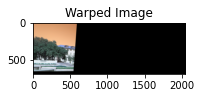

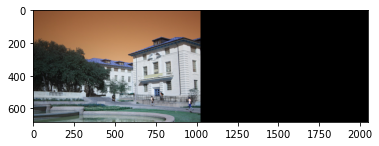

In [11]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()